In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Homework 4



#### Homework 4.1

4.1.a Create a figure with two subplots in a row.
One shows a sine wave of x from with x = 0 ... 2*pi the other shows the tagent of x with the same range.
Label the figures.

Should look something like:
<img src="./images/Figure_with_multipleplot.png" width="300" height="200">



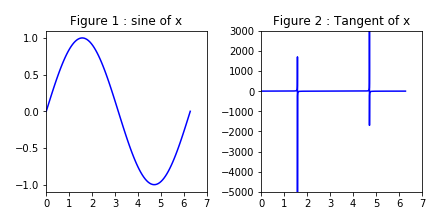

In [16]:
fig = plt.figure(figsize=(6,3),constrained_layout=True)
ax1 = fig.add_subplot(121)
ax1.set_title("Figure 1 : sine of x")
X = np.linspace(0, 2 * np.pi, 100, endpoint=True)
S= np.sin(X)
plt.xlim(0,7)
plt.xticks(np.linspace(0,7,8,endpoint=True))
plt.plot(X, S, color="blue", linestyle="-")
ax2 = fig.add_subplot(122)

ax2.set_title("Figure 2 : Tangent of x")
Z = np.linspace(0, 2 * np.pi,8000, endpoint=True)
T= np.tan(Z)
plt.xlim(0,7)
plt.ylim(-5000,3000)
plt.xticks(np.linspace(0,7,8,endpoint=True))
plt.plot(Z, T, color="blue", linestyle="-")
plt.tight_layout()



#### Homework 4.2
 

Make a combined plot of a  red spiral with a scatter plot.

The red spiral has r from 0 to 3 with steps of 0.1 and
a theta of 2 * pi * r.

The scatter uses the same theta as the spiral but the radius r is offset by a random value ranging from -.5 to .5.
The size of the plotted locations is 100 * r^2 and the color uses theta.

Use an alpha value of .4 for the colors in the scatter plot.
Limit the size of the plot (rmax) to 2.5
 
 Should look something like:
<img src="./images/lineplot_with_scatterplot.png" width="300" height="200">


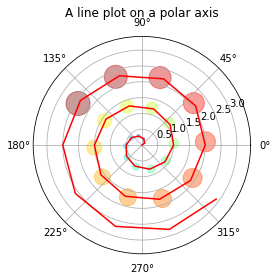

In [3]:
import random
r = np.arange(0, 3, 0.1)
theta = 2 * np.pi * r
fig = plt.figure()

ax = plt.subplot(111, projection='polar')
ax.plot(theta, r,'r')
ax.set_rlabel_position(22.5)  # get radial labels away from plotted line
ax.grid(True)
ax.set_title("A line plot on a polar axis", va='bottom')

ro= r + np.random.uniform(-0.5,0.5)
thetao= 2 * np.pi * ro
areao= 100 *( ro**2)
colorso= thetao
ax.set_rmax(2.5)
c=ax.scatter(thetao, ro, c=colorso, s=areao, cmap='jet', alpha=0.4)

plt.show()

#### Homework 4.3
Create a 2d histogram of 100000 points

x is a generated from a normal random distribution 

y is generated from a geometric random value witha p=.01 
Use the LogNorm color settings for hist2d.
And show the colorbar as well.

Should look something like:
<img src="./images/2d_histogram.png" width="300" height="200">


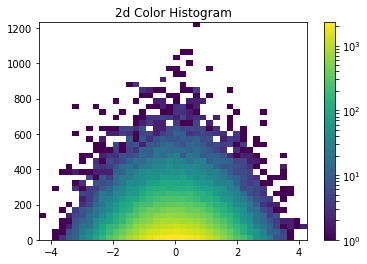

In [73]:
from matplotlib.colors import LogNorm
x = np.random.randn(100000)
y = np.random.geometric(0.01, size=100000)
#X, Y = np.meshgrid(x, y)
plt.hist2d(x,y, bins=40,norm=LogNorm())
plt.colorbar()
plt.title('2d Color Histogram')
plt.show()

#### Homework 4.4
Show the same data in homewowrk 4.3 in a 3d plot.
Use a numpy.histrogram2d funtion to generate the data:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html

Need to use statements:

<em>from mpl_toolkits.mplot3d import Axes<br/>
fig = plt.figure()<br/>
ax = fig.gca(projection='3d')</em>

...

ax.plot_surface(xm,ym,hist,rstride=1,cstride=1,cmap=plt.cm.jet)

</em>

Should look something like:
<img src="./images/3dplot.png" width="300" height="200">


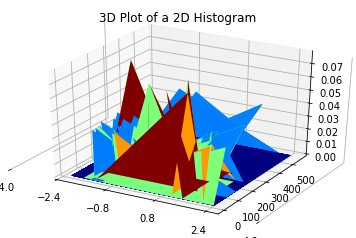

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title("3D Plot of a 2D Histogram")

x = np.random.randn(100)
y = np.random.geometric(0.01, size=100)

H= np.histogram2d(x, y, bins=(100,100),normed=LogNorm())


X,Y = np.meshgrid(x,y)
a=H[0] #Take the first elemnt of the array generated from histogram2D
plt.xticks(np.linspace(-4,4,6,endpoint=True))
plt.yticks(np.linspace(0,500,6,endpoint=True))




ax.plot_surface(X,Y,a,rstride=1,cstride=1,cmap=plt.cm.jet)
plt.show()

## Extra credit 
### Create a countour plot with 1000 points ,which shows the function x^2+y^2/y
    use clabel to label the countour plot

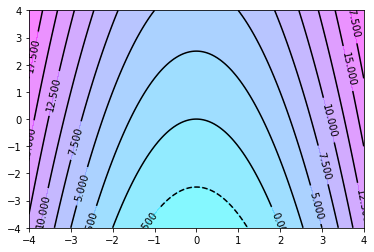

In [6]:
#extra credit 
#create a countour plot with 1000 points ,which shows the function
#use clabel to label the countour plot

def f(x,y): 
    return x**2+y**2/y

n = 1000
x = np.linspace(-4,4,n)
y = np.linspace(-4,4,n)
X,Y = np.meshgrid(x,y)

plt.contourf(X, Y, f(X,Y), 10, alpha=.5, cmap='cool')
C=plt.contour(X, Y, f(X,Y), 10, colors='black', linewidth=.5)
plt.clabel(C, inline=1, fontsize=10)

plt.show()

### Create your own dataset and perform interesting plots out of it

In [7]:
my_df = pd.DataFrame({
    'name':['jack','jenny','jessi','joseph','jacob','james','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','F','M','M','F','M'],
    'state':['maryland','dc','california','dc','pennsylvania','texas','texas'],
    'num_cars':[2,0,0,3,2,1,4],
    'num_houses':[5,1,0,5,2,2,3]
})

Show a scatter plot having the number of cars and number of houses.

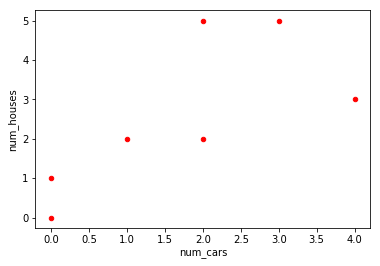

In [8]:
my_df.plot(kind='scatter',x='num_cars',y='num_houses',color='red')
plt.show()

Show a bar graph of names against ages

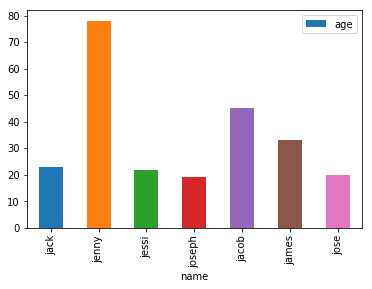

In [9]:
my_df.plot(kind='bar',x='name',y='age')


Show the comparision between number of cars and number of houses each person has

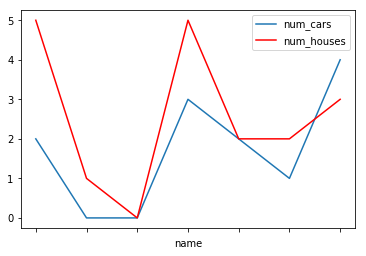

In [15]:
ax = plt.gca()

my_df.plot(kind='line',x='name',y='num_cars',ax=ax)
my_df.plot(kind='line',x='name',y='num_houses', color='red', ax=ax)

plt.show()

Plot a graph showing the number of males and females in a particular state

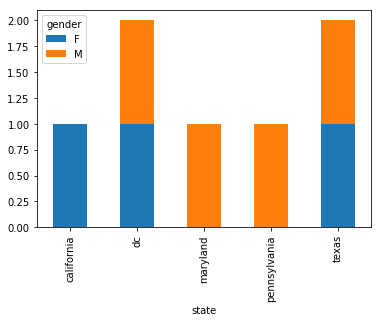

In [11]:
my_df.groupby(['state','gender'])['name'].size().unstack().plot(kind='bar',stacked=True)
plt.show()

## A short tutorial on plotting images with Matplotlib.

"matplotlib.image" is the image module supports basic image loading, rescaling and display operations.

In [2]:
import matplotlib.image as mpimg

### Importing image data into Numpy arrays

Matplotlib only supports PNG images.
Loading image data is supported by the Pillow library.

In [3]:
img = mpimg.imread('./images/butterfly.png')
print(img)

[[[0.5647059  0.47058824 0.27450982]
  [0.5686275  0.46666667 0.28235295]
  [0.57254905 0.46666667 0.26666668]
  ...
  [0.45490196 0.38039216 0.20392157]
  [0.4627451  0.38039216 0.21176471]
  [0.45882353 0.3764706  0.21176471]]

 [[0.5764706  0.46666667 0.29411766]
  [0.5686275  0.46666667 0.28235295]
  [0.57254905 0.46666667 0.28627452]
  ...
  [0.45882353 0.3882353  0.19215687]
  [0.4627451  0.3764706  0.21176471]
  [0.45490196 0.3764706  0.19607843]]

 [[0.5803922  0.47058824 0.28627452]
  [0.56078434 0.4745098  0.2901961 ]
  [0.56078434 0.4627451  0.2784314 ]
  ...
  [0.45882353 0.3882353  0.19607843]
  [0.45882353 0.3764706  0.20392157]
  [0.46666667 0.37254903 0.20784314]]

 ...

 [[0.38431373 0.34509805 0.3137255 ]
  [0.39607844 0.33333334 0.32941177]
  [0.3882353  0.3372549  0.30980393]
  ...
  [0.4509804  0.39607844 0.3647059 ]
  [0.44705883 0.39607844 0.37254903]
  [0.45490196 0.40784314 0.36078432]]

 [[0.38431373 0.33333334 0.32941177]
  [0.3882353  0.3254902  0.31764707]


- Matplotlib has rescaled the 8 bit data from each channel to floating point data between 0.0 and 1.0.  
- Matplotlib plotting can handle float32 and uint8, but image reading/writing for any format other than PNG is limited to uint8 data. 
- This is because most displays can only render 8 bits per channel worth of color gradation, Because that's about all the human eye can see. 
- Each inner list represents a pixel.

## Plotting numpy arrays as images
The data is now in the form of an array, to render it <b> imshow()</b> function is used. Here we'll grab the plot object. This object gives you an easy way to manipulate the plot from the prompt.


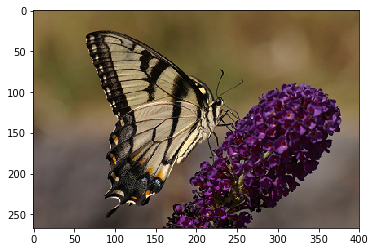

In [4]:
imgplot = plt.imshow(img)

## Applying pseudocolor schemes to image plots
Pseudocolor can be a useful for enhancing contrast and visualizing your data more easily.

Pseudocolor is only relevant to single-channel, grayscale, luminosity images. 

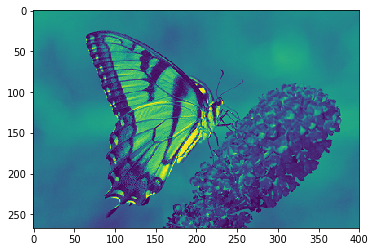

In [5]:
lum_img = img[:, :, 0]   # This is array slicing.  

plt.imshow(lum_img)

Now, with a luminosity (2D, no color) image, the default colormap (aka lookup table, LUT), is applied. The default is called viridis.

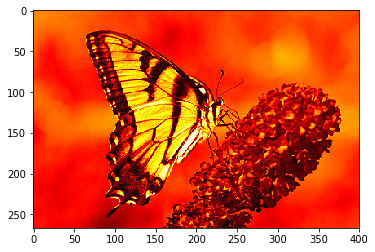

In [7]:
plt.imshow(lum_img, cmap="hot")

You can also change colormaps on existing plot objects using the <b>set_cmap()</b> method:

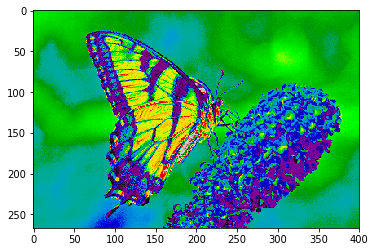

In [11]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')

## Color scale reference
It's helpful to have an idea of what value a color represents. We can do that by adding color bars.

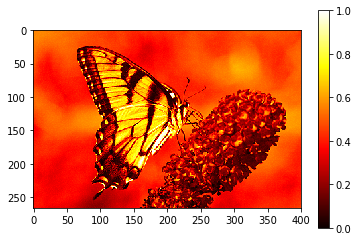

In [13]:
imgplot = plt.imshow(lum_img,cmap="hot")
plt.colorbar()


## Examining a specific data range

To create a histogram of our image data, we use the hist() function. This can be used to enhance the contrast of a particular region.

(array([ 453.,   71.,  108.,  148.,  155.,  179.,  205.,  218.,  233.,
         300.,  317.,  285.,  308.,  307.,  347.,  328.,  335.,  337.,
         370.,  363.,  422.,  383.,  407.,  424.,  429.,  456.,  446.,
         438.,  399.,  429.,  408.,  448.,  395.,  411.,  445.,  397.,
         396.,  383.,  365.,  398.,  342.,  378.,  390.,  400.,  406.,
         380.,  397.,  366.,  399.,  407.,  387.,  381.,  351.,  354.,
         334.,  374.,  370.,  347.,  357.,  317.,  338.,  283.,  310.,
         301.,  306.,  278.,  279.,  263.,  281.,  310.,  298.,  324.,
         311.,  341.,  308.,  314.,  316.,  300.,  324.,  289.,  342.,
         312.,  401.,  431.,  496.,  521.,  595.,  666.,  644.,  713.,
         744.,  849.,  879., 1081., 1174., 1282., 1370., 1447., 1483.,
        1439., 1423., 1361., 1359., 1414., 1348., 1372., 1333., 1363.,
        1301., 1356., 1337., 1409., 1453., 1453., 1474., 1392., 1385.,
        1336., 1371., 1275., 1313., 1379., 1312., 1230., 1289., 1183.,
      

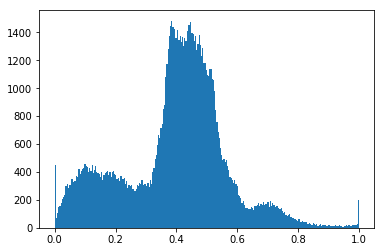

In [20]:
plt.hist(lum_img.ravel(), bins=256, range=(0.0, 1.0))

#numpy.ravel(array, order = ‘C’) : returns contiguous flattened array(1D array with all the input-array elements and with the same type as it).

You can get extra contrast by clipping the regions above and/or below the peak.  
We can adjust the upper limit, so that we effectively "zoom in on" part of the histogram.
We do this by passing the clim argument to imshow or by calling the set_clim() method of the image plot object.

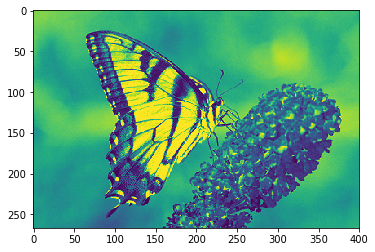

In [21]:
imgplot = plt.imshow(lum_img, clim=(0.0, 0.7))

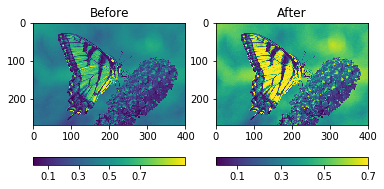

In [22]:
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(lum_img)
a.set_title('Before')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(lum_img)
imgplot.set_clim(0.0, 0.7)
a.set_title('After')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

## Array Interpolation schemes
Interpolation calculates what the color or value of a pixel "should" be, according to different mathematical schemes.
One common place that this happens is when you resize an image. The number of pixels change, but you want the same information. Since pixels are discrete, there's missing space. Interpolation is how you fill that space. This is why your images sometimes come out looking pixelated when you blow them up. The effect is more pronounced when the difference between the original image and the expanded image is greater. Let's take our image and shrink it. We're effectively discarding pixels, only keeping a select few. Now when we plot it, that data gets blown up to the size on your screen. The old pixels aren't there anymore, and the computer has to draw in pixels to fill that space.

We'll use the Pillow library that we used to load the image also to resize the image.

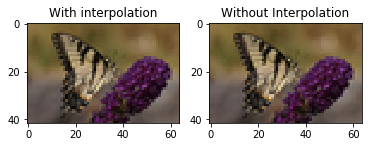

In [40]:
from PIL import Image

img = Image.open('./images/butterfly.png')
img.thumbnail((64, 64), Image.ANTIALIAS)  # resizes image in-place
fig = plt.figure()
a = fig.add_subplot(1,2,1)
a.set_title('With interpolation')
imgplot = plt.imshow(img)
a = fig.add_subplot(1,2,2)
a.set_title('Without Interpolation')
imgplot = plt.imshow(img, interpolation="nearest") #"nearest", which does no interpolation.


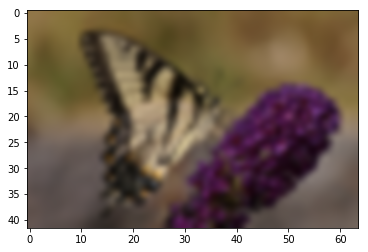

In [39]:
fig = plt.figure()

imgplot = plt.imshow(img, interpolation="bicubic") #bicubic makes it blurry

## Create Thumbnails
The <b>thumbnail()</b> method takes a tuple specifying the new size and converts the image to a thumbnail image with size that fits within the tuple. 

In [44]:
img.thumbnail((128,128))


## Copy and Paste Regions
Cropping a region from an image is done using the crop() method.
The region is defined by a 4-tuple, where coordinates are (left, upper, right, lower). PIL uses a coordinate system with (0, 0) in the upper left corner.
The extracted region can be rotated and then put back using the paste() method .

In [47]:
box = (100,100,400,400)
region = img.crop(box) 
region = region.transpose(Image.ROTATE_180)
cp = img.paste(region,box)


## Interactive Annotation
ginput(), that lets you interaact with an application.

Please click 3 points


C:\python\envs\py27\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


you clicked: []


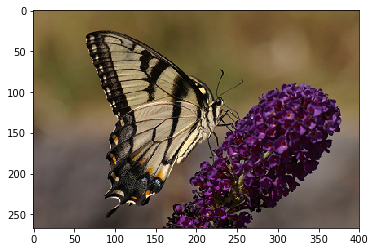

In [6]:
from PIL import Image
from pylab import *

im = array(Image.open('./images/butterfly.png'))
imshow(im)
print 'Please click 3 points'
x = ginput(3)
print 'you clicked:',x
show()

## Graylevel Transforms

After reading images to NumPy arrays, we can perform any mathematical operation we like on them. A simple example of this is to transform the graylevels of an image. Take any function f that maps the interval 0 . . . 255 (or, if you like, 0 . . . 1) to itself (meaning that the output has the same range as the input). Here are some examples:

0 253
2 255
100 199
0 251


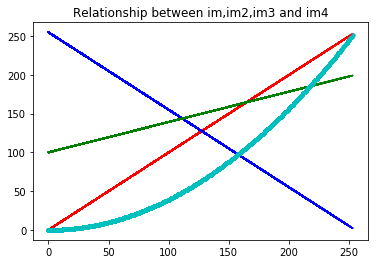

In [36]:
im = array(Image.open('./images/butterfly.png').convert('L'))

im2 = 255 - im # invert image

im3 = (100.0/255) * im + 100 # clamp to interval 100...200

im4 = 255.0 * (im/255.0)**2 # squared
print int(im.min()), int(im.max())
print int(im2.min()), int(im2.max())
print int(im3.min()), int(im3.max())
print int(im4.min()), int(im4.max())

plt.plot(im, im, 'r--', im, im2, 'b--', im, im3, 'g--',im,im4, 'c.')
plt.title("Relationship between im,im2,im3 and im4")
plt.show()

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

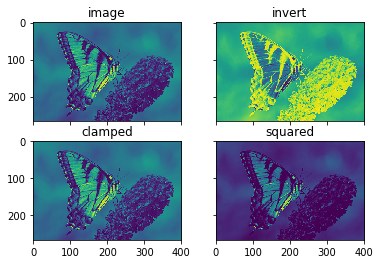

In [35]:
f, axarr = plt.subplots(2, 2)
axarr[0, 0].imshow(im)
axarr[0, 0].set_title('image')
axarr[0, 1].imshow(im2)
axarr[0, 1].set_title('invert')
axarr[1, 0].imshow(im3)
axarr[1, 0].set_title('clamped')
axarr[1, 1].imshow(im4)
axarr[1, 1].set_title('squared')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

## Image Derivatives
The image intensity change over the image is important information and is used for many applications.
The intensity change is described with the x and y derivatives.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

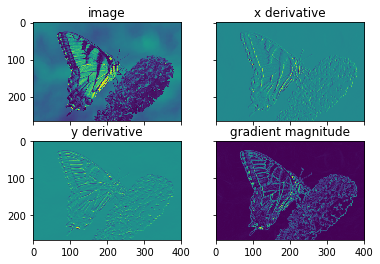

In [43]:
from PIL import Image
from numpy import *
from scipy.ndimage import filters

im = array(Image.open('./images/butterfly.png').convert('L'))

# Sobel derivative filters
#This computes x and y derivatives and gradient magnitude using the Sobel filter.
imx = zeros(im.shape)
filters.sobel(im,1,imx)

imy = zeros(im.shape)
filters.sobel(im,0,imy)

magnitude = sqrt(imx**2+imy**2)
f, axarr = plt.subplots(2, 2)
axarr[0, 0].imshow(im)
axarr[0, 0].set_title('image')
axarr[0, 1].imshow(imx)
axarr[0, 1].set_title('x derivative')
axarr[1, 0].imshow(imy)
axarr[1, 0].set_title('y derivative')
axarr[1, 1].imshow(magnitude)
axarr[1, 1].set_title('gradient magnitude')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

Using this approach has the drawback that derivatives are taken on the scale determined by the image resolution. To be more robust to image noise and to compute derivatives at any scale, Gaussian derivative filters can be used.

Text(0.5,1,'guassian filter on y')

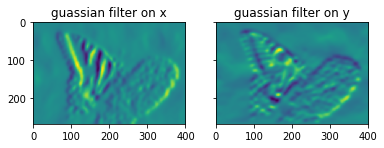

In [48]:
sigma = 5 # standard deviation

imx = zeros(im.shape)
imxx=filters.gaussian_filter(im, (sigma,sigma), (0,1), imx)

imy = zeros(im.shape)
imyy=filters.gaussian_filter(im, (sigma,sigma), (1,0), imy)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(imxx)
ax2.imshow(imyy)
ax1.set_title('guassian filter on x')
ax2.set_title('guassian filter on y')

## Morphology—Counting Objects
Morphology (or mathematical morphology) is a framework and a collection of image processing methods for measuring and analyzing basic shapes. Morphology is usually applied to binary images but can be used with grayscale also. A binary image is an image in which each pixel takes only two values, usually 0 and 1. Binary images are often the result of thresholding an image, for example with the intention of counting objects or measuring their size. 

Number of objects: 117


Text(0.5,1,'label image')

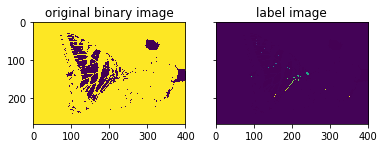

In [58]:
from scipy.ndimage import measurements,morphology

# load image and threshold to make sure it is binary
im = array(Image.open('./images/butterfly.png').convert('L'))
im = 1*(im<128)

labels, nbr_objects = measurements.label(im)
print "Number of objects:", nbr_objects
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(im)
ax2.imshow(labels)
ax1.set_title('original binary image')
ax2.set_title('label image')

This loads the image and makes sure it is binary by thresholding. Multiplying by 1 converts the boolean array to a binary one. Then the function label() finds the individual objects and assigns integer labels to pixels according to which object they belong to. The graylevel values indicate object index. As you can see, there are small connections between some of the objects. Using an operation called binary opening, we can remove them.

Number of objects: 5


Text(0.5,1,'labeled image')

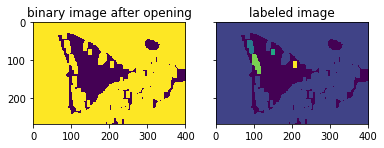

In [63]:
# morphology - opening to separate objects better
im_open = morphology.binary_opening(im,ones((9,5)),iterations=2)

labels_open, nbr_objects_open = measurements.label(im_open)
print "Number of objects:", nbr_objects_open
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(im_open)
ax2.imshow(labels_open)
ax1.set_title('binary image after opening')
ax2.set_title('labeled image')

## Reference

[1] https://www.oreilly.com/library/view/programming-computer-vision/9781449341916/ch01.html
